In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from textblob import TextBlob
from IPython.core.display import HTML
from random import randint


# 定义一个函数来呈现不同样式的元素
def render_elem(values, style):
    if style == "section":
        # 显示一个带有“section”样式的HTML块
        display(HTML(f'<div class="section">{values}</div>'))
    html = ""
    flag = False
    for value in values:
        if style == "insight":
            # 显示一个带有“insight”样式的项目
            html += f'<ul class="bullet"><li class="insight"> - {value}</li></ul>'
        if style == "data-insight":
            if ":" in value:
                flag = True
                # 显示一个带有“data-insight”样式的项目，如果值包含冒号，则分为标签和内容
                html += f'<ul class="bullet"><li class="data-insight"><span>{value.split(":")[0]}</span>{value.split(":")[1]}</li></ul>'
            else:
                html += f'<ul class="bullet"><li class="data-insight">{value}</li></ul>'

    if flag == True:
        # 如果flag为True，则在项目之间插入水平线
        html += "<hr>"
    display(HTML(html))


# 定义一个CSS样式函数
def css_styling():
    styles = """
    <style>
        .section {
            color:#33A1C9;
            font-size:20px;
            font-weight: bold;
            padding-top:15px;
        }
        .sub_section {
            color:#f1c40f;
            font-size:16px;
            font-weight: bold;
            padding-top:10px;
        }
        .insight {
            color:#C70039;
            font-size:14px;
            font-weight: bold;
        }
        .data-insight {
            background-color: #f9f9f9;
            border-left: 4px solid #C70039;
            padding: 8px;
            margin-top: 5px;
            font-weight: normal;
        }
        .data-insight span{
            font-weight: bold;
            display: block;
        }
        .bullet {
            list-style-type: circle;
        }
        ul{
            margin:0px;
            display: contents;
            list-style-type: square;
        }
    </style>
    """
    return HTML(styles)


# 应用CSS样式
css_styling()

In [13]:
render_elem("Introduction", "section")
# 这是一个多选题答案竞赛。该数据集由一个大型语言模型（LLM），具体来说是GPT-3.5生成，被要求根据各种科学主题的文本片段编写多选题。使用此数据集的竞赛目标是预测由LLM编写的问题的最可能答案。
render_elem(
    [
        "It's Multiple-choice Question  answer competition. The dataset generated by a large language model (LLM), specifically GPT-3.5, where it was asked to write a multiple-choice question based on snippets of text on a range of scientific topics. The objective of the competition this dataset is used for is to predict the most probable answers to the questions written by the LLM."
    ],
    "data-insight",
)

In [14]:
render_elem("Loading the Dataset", "section")
data = pd.read_csv("./train.csv")
data.head()

,id,prompt,A,B,C,D,E,answer
0,0,Which of the following statements accurately d...,MOND is a theory that reduces the observed mis...,MOND is a theory that increases the discrepanc...,MOND is a theory that explains the missing bar...,MOND is a theory that reduces the discrepancy ...,MOND is a theory that eliminates the observed ...,D
1,1,Which of the following is an accurate definiti...,Dynamic scaling refers to the evolution of sel...,Dynamic scaling refers to the non-evolution of...,Dynamic scaling refers to the evolution of sel...,Dynamic scaling refers to the non-evolution of...,Dynamic scaling refers to the evolution of sel...,A
2,2,Which of the following statements accurately d...,The triskeles symbol was reconstructed as a fe...,The triskeles symbol is a representation of th...,The triskeles symbol is a representation of a ...,The triskeles symbol represents three interloc...,The triskeles symbol is a representation of th...,A
3,3,What is the significance of regularization in ...,Regularizing the mass-energy of an electron wi...,Regularizing the mass-energy of an electron wi...,Regularizing the mass-energy of an electron wi...,Regularizing the mass-energy of an electron wi...,Regularizing the mass-energy of an electron wi...,C
4,4,Which of the following statements accurately d...,The angular spacing of features in the diffrac...,The angular spacing of features in the diffrac...,The angular spacing of features in the diffrac...,The angular spacing of features in the diffrac...,The angular spacing of features in the diffrac...,D


In [4]:
render_elem(
    [
        "ID: ID of the question",
        "prompt: The question being asked.",
        "A to E: These are the possible answers to the question.",
        "answer: This column represents the correct answer to the question.",
    ],
    "data-insight",
)
render_elem(
    [
        "Out of 5 options A to E, we need to Predict 3 options i.e need to eliminate 2 options is enough",
        "As our metric for the competition is Mean Average Precision @ 3 (MAP@3)",
    ],
    "insight",
)

- 在5个选项A到E中，我们需要预测3个选项，即需要消除2个选项就足够了。
- 因为我们竞赛的度量标准是平均精度均值@3（MAP@3）。
ID
问题的ID
提示
被提出的问题。
A到E
这些是问题的可能答案。
答案
这一列代表问题的正确答案。

In [15]:
render_elem("Train Samples", "section")
for _ in range(0, 3):
    index = randint(0, len(data))
    sample = [
        f"{k}: {v[0]}"
        for k, v in data[index : index + 1].reset_index(drop=True).to_dict().items()
    ]
    render_elem(sample, "data-insight")

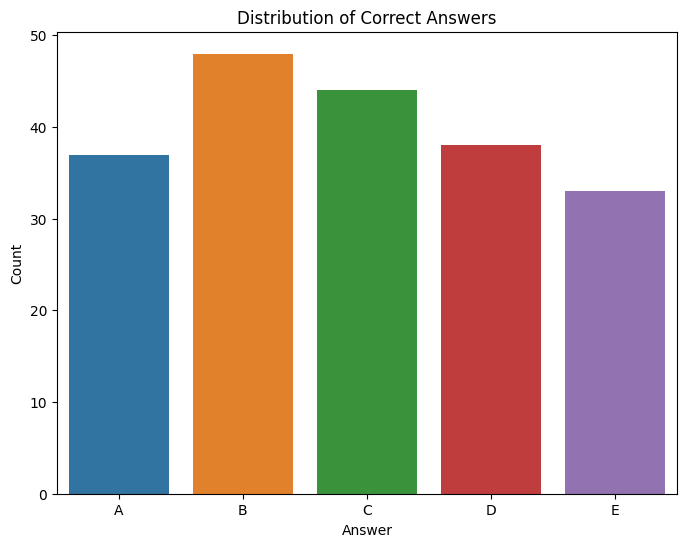

In [16]:
render_elem("Distribution of the correct answers (A, B, C, D, E) - Answers", "section")
plt.figure(figsize=(8, 6))
sns.countplot(x="answer", data=data, order=["A", "B", "C", "D", "E"])
plt.title("Distribution of Correct Answers")
plt.xlabel("Answer")
plt.ylabel("Count")
plt.show()
render_elem(["The distribution is almost uniform and balanced"], "insight")
# - 分布几乎是均匀和平衡的。

In [18]:
render_elem("Distribution of #Characters", "section")
data["prompt_length"] = data["prompt"].apply(len)
data["A_length"] = data["A"].apply(len)
data["B_length"] = data["B"].apply(len)
data["C_length"] = data["C"].apply(len)
data["D_length"] = data["D"].apply(len)
data["E_length"] = data["E"].apply(len)

length_data = data[
    ["prompt_length", "A_length", "B_length", "C_length", "D_length", "E_length"]
]

length_summary = length_data.describe()

length_summary
# #字符的分布

,prompt_length,A_length,B_length,C_length,D_length,E_length
count,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000
mean,72.265000,162.535000,164.295000,165.305000,160.615000,162.105000
std,41.615068,104.448582,110.980998,104.609357,102.836196,105.584727
min,19.000000,1.000000,2.000000,2.000000,1.000000,2.000000
25%,39.000000,87.500000,82.000000,87.000000,89.750000,83.250000
50%,64.000000,140.500000,150.500000,154.500000,140.000000,143.000000
75%,92.250000,233.250000,221.750000,224.750000,231.000000,224.750000
max,277.000000,472.000000,662.000000,530.000000,450.000000,587.000000


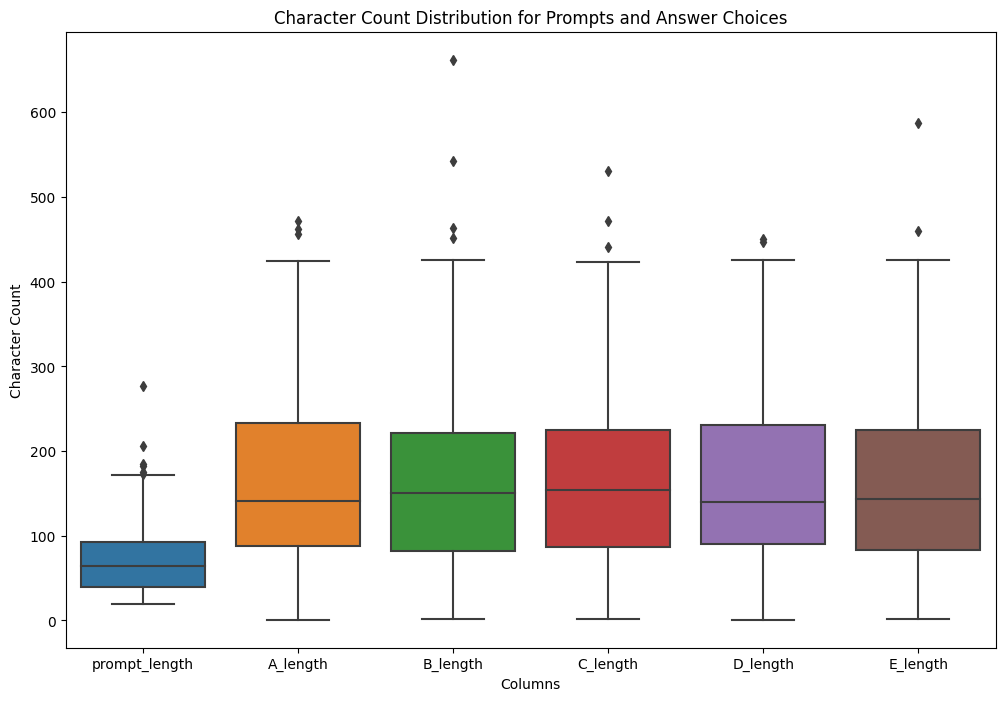

In [20]:
length_data_melted = length_data.melt(var_name="columns", value_name="character_count")

plt.figure(figsize=(12, 8))
sns.boxplot(x="columns", y="character_count", data=length_data_melted)
plt.title("Character Count Distribution for Prompts and Answer Choices")
plt.xlabel("Columns")
plt.ylabel("Character Count")
plt.show()
render_elem(
    [
        "GPT-3 prompt used may have prompt average 80 characters",
        "GPT-3 prompt used may have options average 120 to 250 characters",
    ],
    "insight",
)
# "GPT-3使用的提示可能平均有80个字符",
# "GPT-3使用的选项可能平均有120到250个字符"

In [9]:
render_elem("Distribution of #Words", "section")


def word_count(text):
    return len(text.split())


data["prompt_word_count"] = data["prompt"].apply(word_count)
data["A_word_count"] = data["A"].apply(word_count)
data["B_word_count"] = data["B"].apply(word_count)
data["C_word_count"] = data["C"].apply(word_count)
data["D_word_count"] = data["D"].apply(word_count)
data["E_word_count"] = data["E"].apply(word_count)

word_count_data = data[
    [
        "prompt_word_count",
        "A_word_count",
        "B_word_count",
        "C_word_count",
        "D_word_count",
        "E_word_count",
    ]
]

word_count_summary = word_count_data.describe()

word_count_summary

,prompt_word_count,A_word_count,B_word_count,C_word_count,D_word_count,E_word_count
count,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000
mean,11.360000,25.965000,26.205000,26.300000,25.765000,25.950000
std,6.321408,16.994051,18.144118,16.989799,16.854082,17.449352
min,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,6.000000,13.000000,12.750000,14.000000,14.000000,13.000000
50%,10.000000,22.000000,23.000000,24.000000,22.000000,22.500000
75%,14.000000,37.000000,36.000000,36.000000,36.250000,36.250000
max,42.000000,81.000000,118.000000,82.000000,78.000000,105.000000


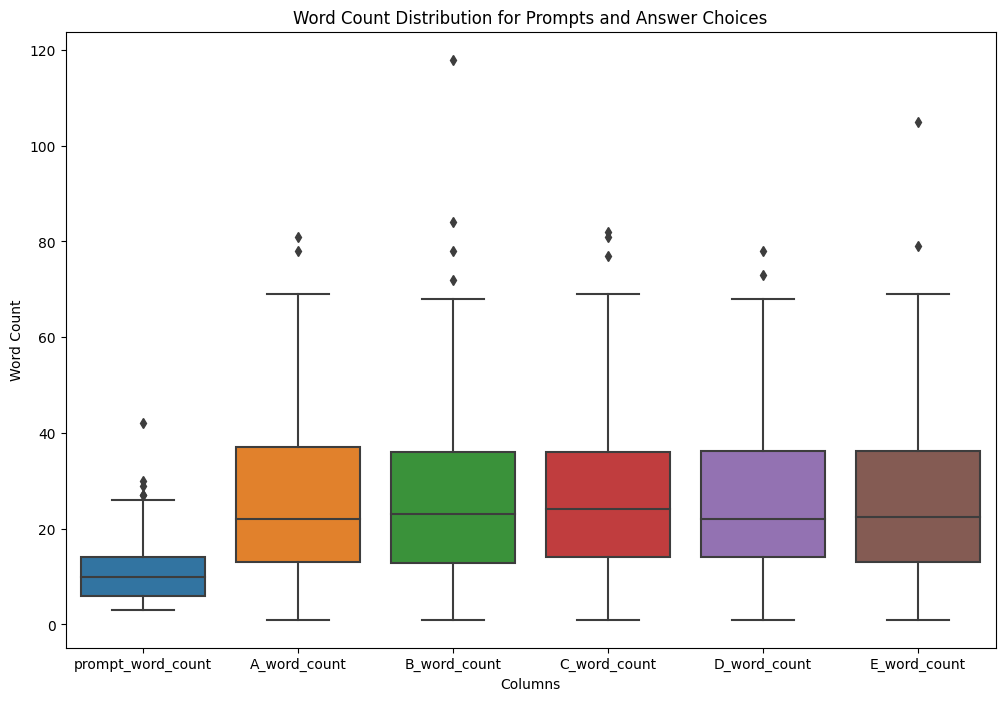

In [21]:
word_count_melted = word_count_data.melt(var_name="columns", value_name="word_count")
plt.figure(figsize=(12, 8))
sns.boxplot(x="columns", y="word_count", data=word_count_melted)
plt.title("Word Count Distribution for Prompts and Answer Choices")
plt.xlabel("Columns")
plt.ylabel("Word Count")
plt.show()
render_elem(
    [
        "GPT-3 prompt used may have prompt average 10 words",
        "GPT-3 prompt used may have options average 20 to 40 characters",
    ],
    "insight",
)
# "GPT-3使用的提示平均约有10个单词"
# "GPT-3使用的选项平均约有20到40个字符"